<a href="https://colab.research.google.com/github/Ryonandha/sms-spam-detector-indonesia/blob/main/SMS_Spam_Detector_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
url = "https://gist.githubusercontent.com/agtbaskara/a1a7017027cc1df9d35cf06e1e5575b7/raw/59870e27ca217d77ac0d8d8dc100551c0dcd14b3/dataset_sms_spam_v2.csv"
df = pd.read_csv(url)

In [ ]:
print("Jumlah Data:", len(df))
print("\nContoh 5 data teratas:")
display(df.head())

Jumlah Data: 1143

Contoh 5 data teratas:


,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,promo
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,promo
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",promo
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",promo
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,promo


In [ ]:
print("\nLabel unik:", df['label'].unique())

label_mapping = {0: 'Normal', 1: 'Spam', 2: 'Spam'}

if df['label'].dtype == 'int64':
    df['label_text'] = df['label'].map(label_mapping)
else:
    df['label_text'] = df['label']

print("\nJumlah per kategori (setelah dirapikan):")
print(df['label_text'].value_counts())


Label unik: ['promo' 'penipuan' 'normal']

Jumlah per kategori (setelah dirapikan):
label_text
normal      569
penipuan    335
promo       239
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['Teks'],
    df['label_text'],
    test_size=0.2,
    random_state=42
)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Dimensi data latih:", X_train_tfidf.shape)

Dimensi data latih: (914, 4251)


In [ ]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

print("Model selesai dilatih!")

Model selesai dilatih!


In [ ]:
y_pred = model.predict(X_test_tfidf)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")
print("\nLaporan Detail:")
print(classification_report(y_test, y_pred))

Akurasi Model: 91.70%

Laporan Detail:
              precision    recall  f1-score   support

      normal       0.94      0.93      0.93        99
    penipuan       0.97      0.89      0.93        82
       promo       0.80      0.94      0.87        48

    accuracy                           0.92       229
   macro avg       0.91      0.92      0.91       229
weighted avg       0.92      0.92      0.92       229



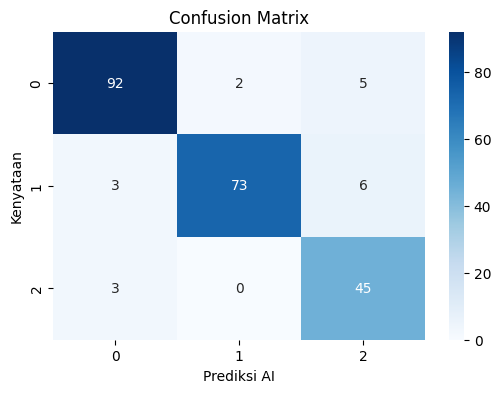

In [ ]:
# Visualisasi Confusion Matrix (Biar keren buat laporan)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi AI')
plt.ylabel('Kenyataan')
plt.show()

In [ ]:
def cek_sms(teks):
    vektor = vectorizer.transform([teks])
    prediksi = model.predict(vektor)[0]
    proba = model.predict_proba(vektor).max() * 100
    return f"Hasil: {prediksi} (Yakin {proba:.1f}%)"

# --- GANTI KALIMAT DI BAWAH INI ---
print(cek_sms("Selamat siang, apakah hari ini ada kuliah?"))
print(cek_sms("Selamat! Anda menang undian 100jt dr Shopee. Klik link bit.ly/xxx"))
print(cek_sms("Promo kuota 50GB cuma 10rb, buruan aktifkan di *123#"))
print(cek_sms("Bro, nanti malam jadi nongkrong gak?"))

Hasil: normal (Yakin 85.7%)
Hasil: penipuan (Yakin 79.2%)
Hasil: promo (Yakin 88.1%)
Hasil: normal (Yakin 80.3%)
